In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

Read csv file

In [2]:
data=pd.read_csv(r'Bangalore_house_data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Missing Data

In [4]:
data.shape

(13320, 9)

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

location and society

In [6]:
data=data.dropna(axis=0,subset=['location'])
data=data.drop(axis=1,columns=['society'])

size

In [7]:
data=data.dropna(axis=0,subset='size')

In [8]:
data.groupby('size').size().sort_values(ascending=False)

size
2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
19 BHK           1
18 Bedroom       1
43 Bedroom       1
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
27 BHK           1
dtype: int64

converting bhk-> rooms

In [51]:
cvt_str_to_num_size={'BHK':2,'Bedroom':0,'RK':1}

for idx in data.index:
    tl=data['size'][idx].split(' ')
    sum=int(tl[0])+cvt_str_to_num_size[tl[1]]
    data['size'][idx]=sum

In [10]:
data['size']=data['size'].astype('int')

In [11]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

fill bath and balcony nan 

In [12]:
replace_bath=math.floor(data.bath.mean())
replace_balcony=data.balcony.mean()

In [13]:
replace_balcony

1.5843430369787568

In [14]:
d=data.iloc[:,[6]]

In [15]:
d=d.fillna(1)

In [16]:
dd=data.iloc[:,[5]]

In [17]:
dd=dd.fillna(2)

In [18]:
data.bath=dd
data.balcony=d

In [19]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
data.head()

In [20]:
work_data=data

area-> sqft

In [21]:
area=[]
for idx in work_data.index:
    area.append(work_data['total_sqft'][idx])

In [22]:
numeric_parts = []
non_numeric_parts = []

for item in area:
    match = re.match(r'(\d+(\.\d+)?)\s*([^\d]*)', str(item))
    if match:
        numeric_parts.append(float(match.group(1)))
        non_numeric_parts.append(match.group(3))
    else:
        numeric_parts.append(None)
        non_numeric_parts.append(item)

In [50]:
ct=0;
m={'Sq. Meter':10.764,'Grounds':2400,'Acres':43560,'Cents':435.56, 'Sq. Yards':9,'Guntha':1089,'Perch':272.25}

for idx in work_data.index:
    x=non_numeric_parts[ct]
    if x=='':
        work_data['total_sqft'][idx]=float(work_data['total_sqft'][idx])
    elif x=='- ':
        t=work_data['total_sqft'][idx]
        t=t.split(' - ')
        work_data['total_sqft'][idx]=float((float(t[0])+float(t[1]))/2)
    else:
        work_data['total_sqft'][idx]=float(numeric_parts[ct])*m[x]
    ct+=1

In [24]:
data=work_data

In [25]:
data.total_sqft=data.total_sqft.astype('float')

In [26]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,4,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,5,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,5,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,4,1200.0,2.0,1.0,51.00


In [27]:
data['area_size']=data['total_sqft']/data['size']
data['size_bath']= data['size']/data['bath']
data['size_balcony']=data['size']/data['balcony']

data['sqft_price']=1e5*(data['price']/data['total_sqft'])

droping rows with outliers

In [28]:
data=data[(data['area_size']>100) & (data['size_bath']>=2) & (data['size_balcony']>=3) & (data['sqft_price']<20000) & (data['total_sqft']<4000)]

In [29]:
work_data=data.iloc[:,[0,2,3,4,5,6,7]]

In [30]:
len(work_data)

4048

In [31]:
work_data.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

### Transforming categorical Data to Numeric

In [33]:
le = LabelEncoder()
le.fit(work_data.area_type.unique())
LabelEncoder()
x=le.transform(work_data.area_type)

In [34]:
work_data.area_type=x

C:\Users\HP\AppData\Local\Temp\ipykernel_26744\4261092858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data.area_type=x


In [35]:
lee= LabelEncoder()
lee.fit(data.location.unique())
LabelEncoder()
y=lee.transform(work_data.location)

In [36]:
work_data.location=y

C:\Users\HP\AppData\Local\Temp\ipykernel_26744\798250791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data.location=y


In [37]:
work_data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,3,203,4,1056.0,2.0,1.0,39.07
4,3,364,4,1200.0,2.0,1.0,51.00
5,3,613,4,1170.0,2.0,1.0,38.00
12,3,25,4,1000.0,2.0,1.0,38.00
20,0,345,3,600.0,1.0,1.0,15.00


In [38]:
store_top_loc=dict(work_data['location'].value_counts().nlargest(10))
for index in work_data.index:
    if work_data.location[index] not in store_top_loc.keys():
        work_data=work_data.drop(index)   

In [39]:
# work_data['size'].unique()

In [40]:
X=work_data.iloc[:,[0,1,2,3,4,5]]
y=work_data.iloc[:,[6]]

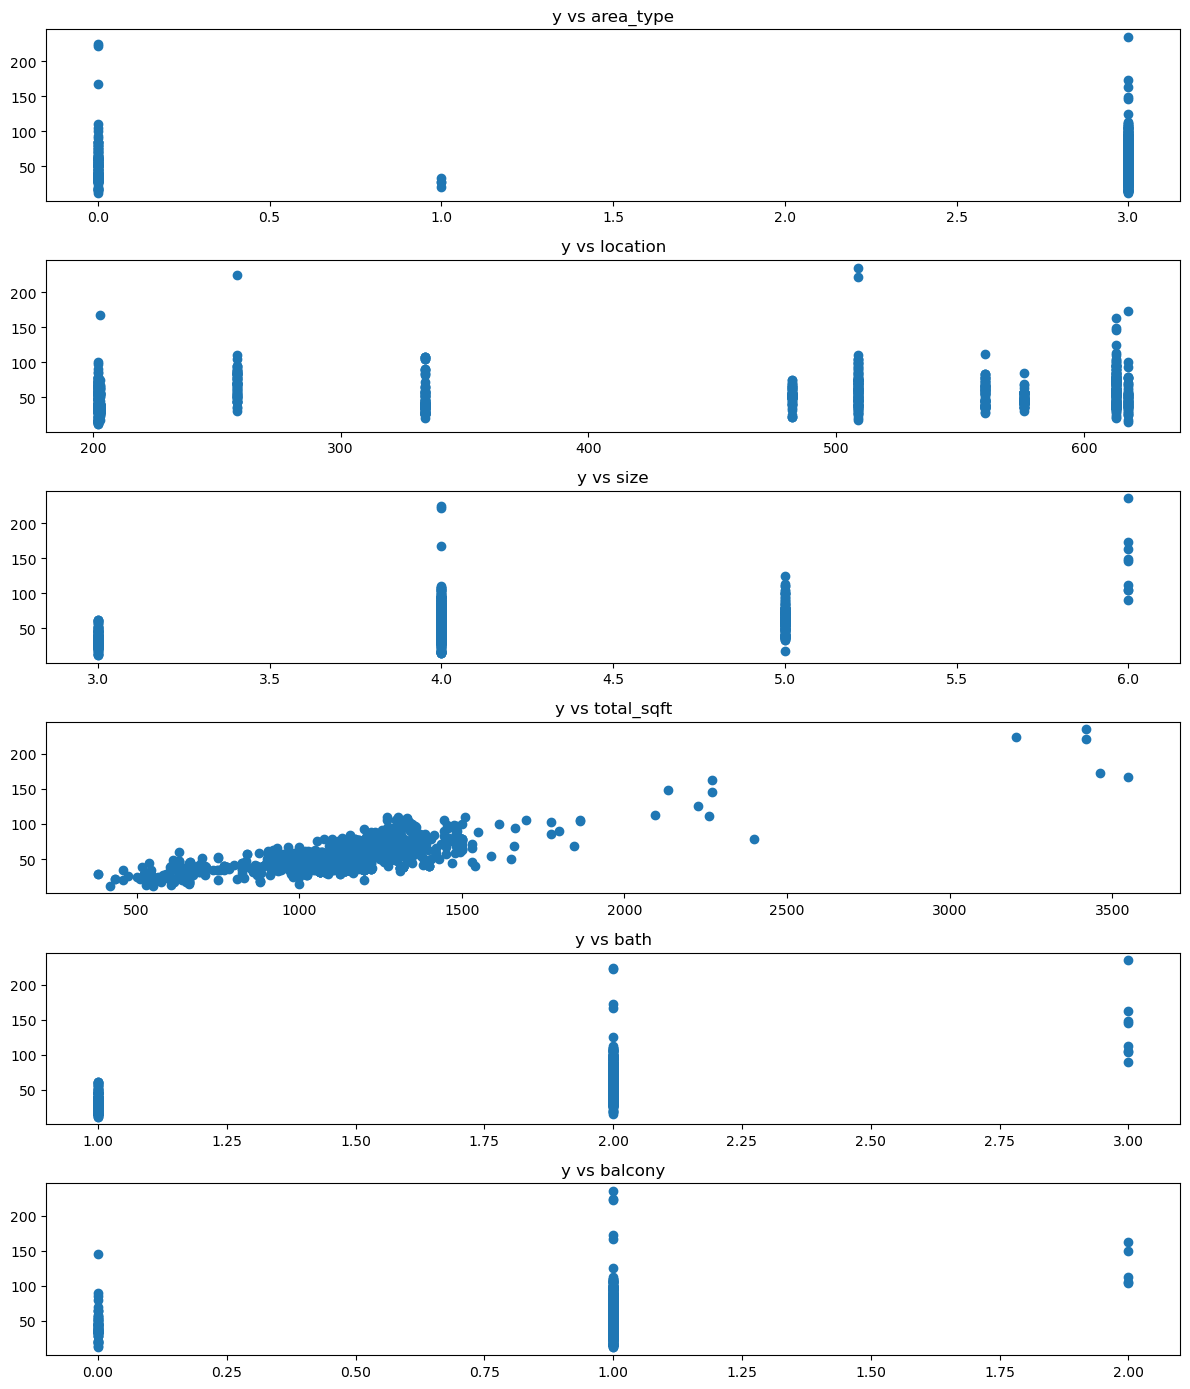

In [41]:
fig,ax=plt.subplots(6,1)

ax[0].scatter(X.iloc[:,[0]],y)
ax[0].set_title('y vs area_type')

ax[1].scatter(X.iloc[:,[1]],y)
ax[1].set_title('y vs location')

ax[2].scatter(X.iloc[:,[2]],y)
ax[2].set_title('y vs size')

ax[3].scatter(X.iloc[:,[3]],y)
ax[3].set_title('y vs total_sqft')

ax[4].scatter(X.iloc[:,[4]],y)
ax[4].set_title('y vs bath')

ax[5].scatter(X.iloc[:,[5]],y)
ax[5].set_title('y vs balcony')



ax[0].figure.set_size_inches(12, 14)
ax[1].figure.set_size_inches(12, 14)
ax[2].figure.set_size_inches(12, 14)
ax[3].figure.set_size_inches(12, 14)
ax[4].figure.set_size_inches(12, 14)
ax[5].figure.set_size_inches(12, 14)

plt.tight_layout()
plt.show()


<Axes: >

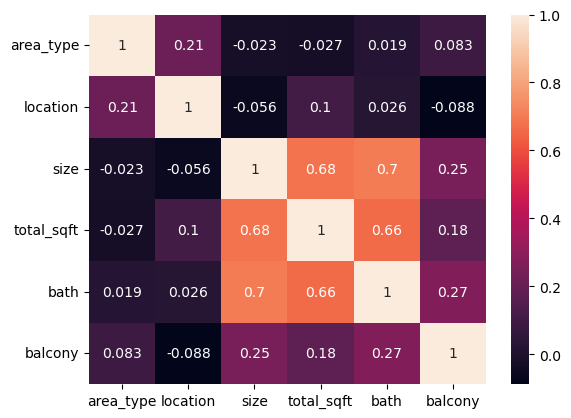

In [42]:
sns.heatmap(X.corr(),annot=True)

### Training Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=802)

In [44]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred=reg.predict(X_test)

### Evaluation

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


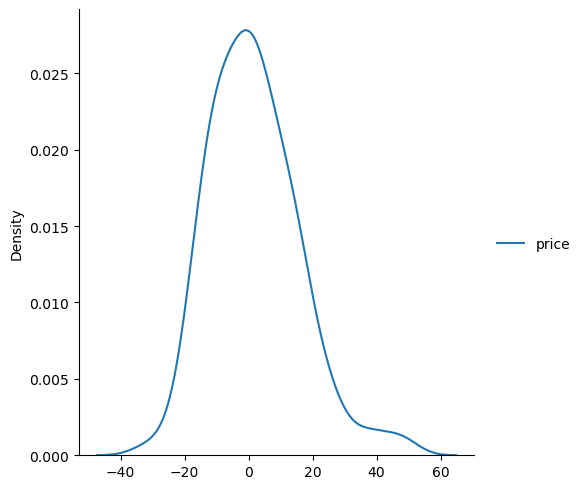

In [46]:
resudial=y_test-y_pred
sns.displot(resudial, kind='kde')

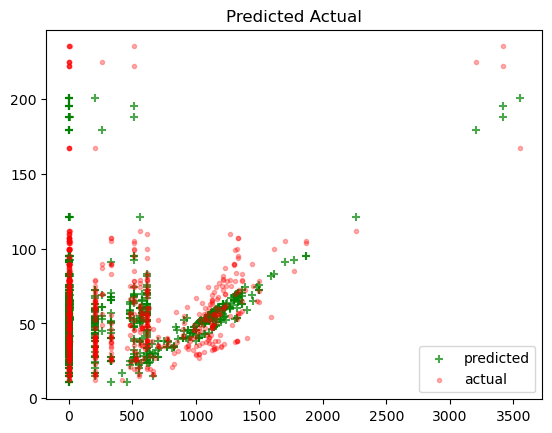

In [47]:
plt.title('Predicted Actual')
for i in range(6):
    plt.scatter(X_test.iloc[:,[i]],y_pred, color='green', marker='+', alpha=.7)
    plt.scatter(X_test.iloc[:,[i]],y_test, color='red', marker='.', alpha=.3)
plt.legend(['predicted','actual'])
plt.show()

In [48]:
result= pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,82.000,63.215950
1,40.450,58.709160
2,15.500,27.309347
3,15.000,20.329313
4,48.000,57.081333
...,...,...
200,85.125,92.384324
201,26.000,25.223252
202,38.120,53.632772
203,55.250,61.087104


In [49]:
r2_score(y_test, y_pred)

0.7948597601086218